# seaborn 패키지를 사용한 시각화

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Histogram

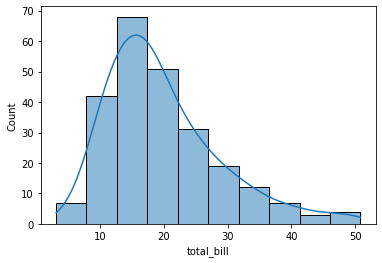

In [7]:
sns.histplot(data=tips, x='total_bill', bins=10, kde=True)   # tips['total_bill]
plt.show()

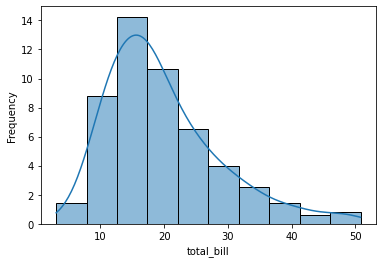

In [8]:
sns.histplot(data=tips, x='total_bill', stat='frequency', bins=10, kde=True)
plt.show()

# Boxplot

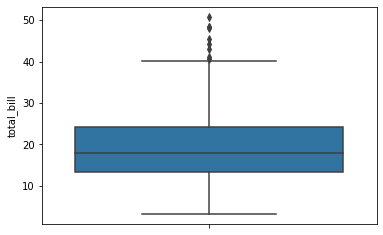

In [9]:
sns.boxplot(data=tips, y='total_bill')
plt.show()

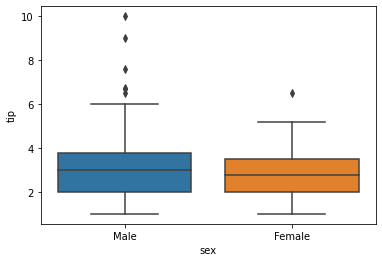

In [10]:
# 성별 tip의 기술 통계량 요약
sns.boxplot(data=tips, x='sex', y='tip')
plt.show()

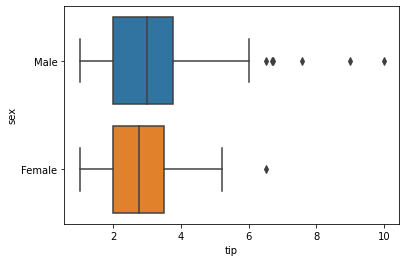

In [11]:
sns.boxplot(data=tips, x='tip', y='sex')
plt.show()

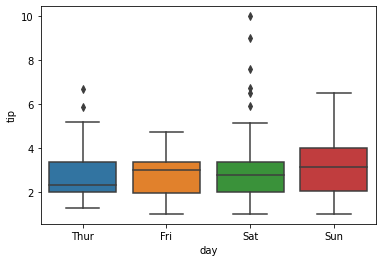

In [12]:
# 요일별 tip의 분포(기술 통계량)
sns.boxplot(data=tips, x='day', y='tip')
plt.show()

# Scatter Plot

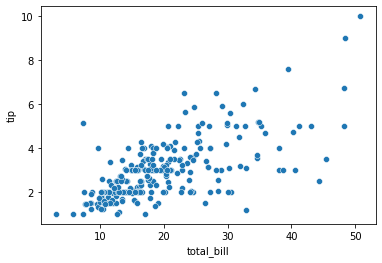

In [13]:
# tip ~ total_bill
sns.scatterplot(data=tips, x='total_bill', y='tip')
plt.show()

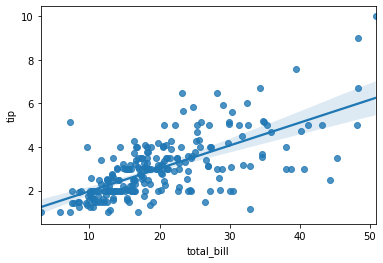

In [14]:
# regression plot: 산점도 그래프 + 선형 회귀 직선
sns.regplot(data=tips, x='total_bill', y='tip')
plt.show()

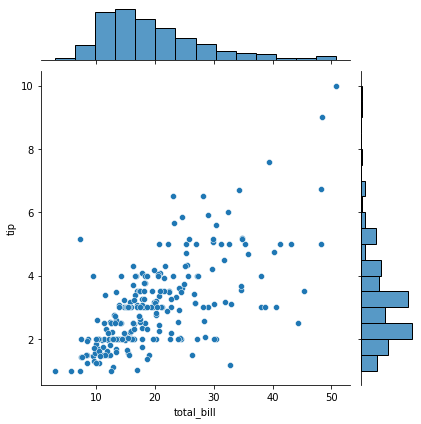

In [15]:
# joint plot: 산점도 그래프 + 히스토그램
sns.jointplot(data=tips, x='total_bill', y='tip')
plt.show()

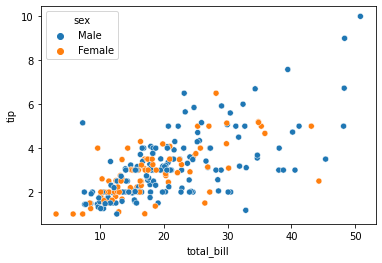

In [16]:
# tip ~ total_bill scatter plot
# 점의 색깔을 성별(sex)에 따라서 다르게 표현 
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='sex')
plt.show()

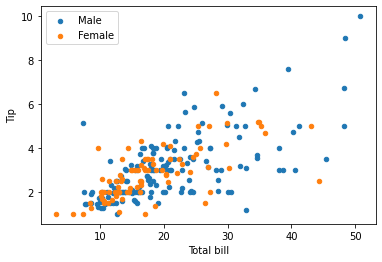

In [17]:
tips_male = tips[tips['sex'] == 'Male']
tips_female = tips[tips['sex'] == 'Female']

plt.scatter(x=tips_male['total_bill'], y=tips_male['tip'], label='Male', s=20)
plt.scatter(x=tips_female['total_bill'], y=tips_female['tip'], label='Female', s=20)

plt.legend()
plt.xlabel('Total bill')
plt.ylabel('Tip')
plt.show()

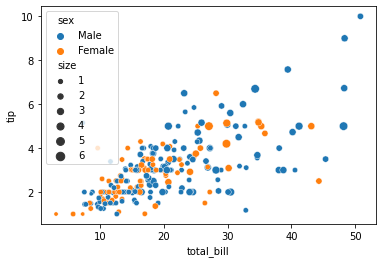

In [18]:
# tip ~ total_bill scatter plot
# 점의 색상은 성별에 따라서 다르게, 점의 크기를 인원수(sise)에 따라서 다르게 표현
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='sex', size='size')
plt.show()

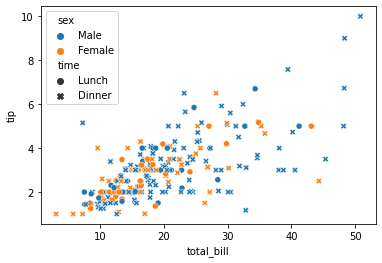

In [19]:
# tip ~ total_bill scatter plot
# 점의 색깔은 성별에 따라서 다르게, market의 종류를 시간에 따라서 다르개 표현
# R경우, ggplot(data=df, geom_point(mapping=aes(x=tb, y=tip, color=sex)))

sns.scatterplot(data=tips, x='total_bill', y='tip', hue='sex', 
                style='time')
plt.show()

# Bar Plot

## `countplot()`

* 카테고리 타입 변수들의 빈도수(count)를 막대로 표현한 그래프

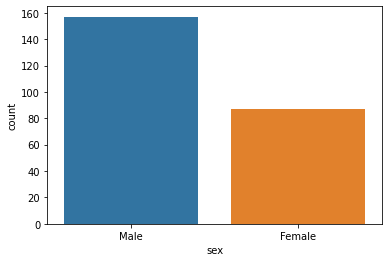

In [20]:
sns.countplot(data=tips, x='sex')
plt.show()

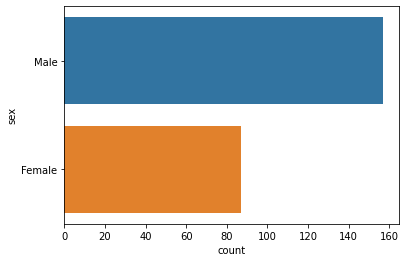

In [21]:
sns.countplot(data=tips, y='sex')
plt.show()

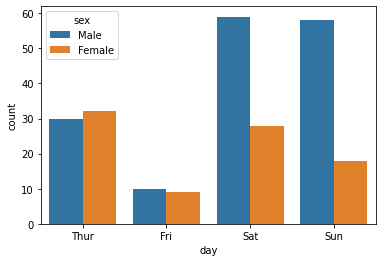

In [22]:
# 요일별 빈도수 막대 그래프 
sns.countplot(data=tips, x='day', hue='sex')
plt.show()

## barplot()

* 그룹별 변수(컬럼)의 요약 통계량(e.g. 평균)

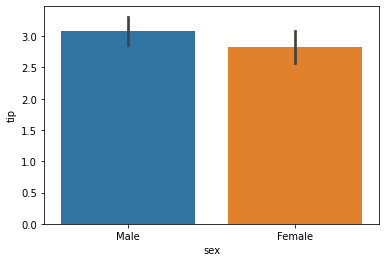

In [23]:
import numpy as np
sns.barplot(data=tips, x='sex', y='tip')
#  estimator=np.median 와 같이 넣을 수 있음
plt.show()

In [24]:
print('Male tip mean:', tips[tips['sex'] == 'Male']['tip'].mean())
print('Female tip mean:', tips[tips['sex'] == 'Female']['tip'].mean())

Male tip mean: 3.0896178343949052
Female tip mean: 2.833448275862069


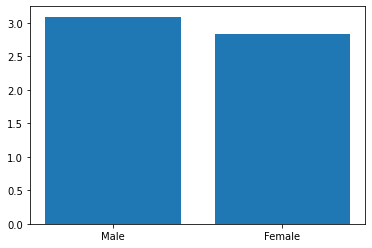

In [25]:
import pandas as pd
male_tip = tips[tips['sex'] == 'Male']['tip'].mean()
female_tip = tips[tips['sex'] == 'Female']['tip'].mean()

tip_by_gender = pd.Series(data=[male_tip, female_tip],
                           index=['Male', 'Female'])
plt.bar(x=tip_by_gender.index, height=tip_by_gender.values)
plt.show()

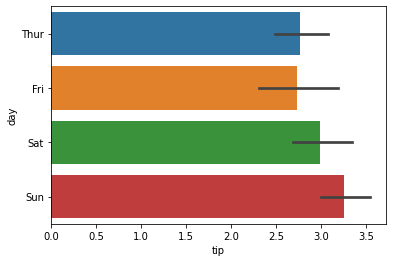

In [26]:
# 요일별 tip의 평균 가로 막대 그래프
sns.barplot(data=tips, y='day', x='tip')
plt.show()

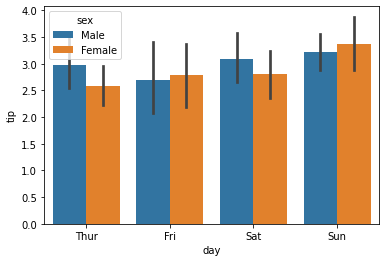

In [27]:
# 요일별 성별 tip의 평균 세로 막대 그래프(막대 색깔 ~ 성별)
sns.barplot(data=tips, x='day', y='tip', hue='sex')
plt.show()

# Line Plot

In [28]:
import numpy as np

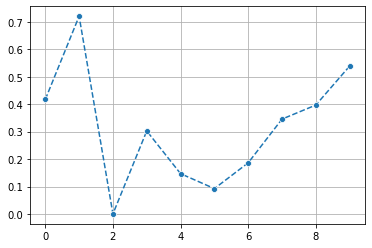

In [29]:
x_data = np.arange(10)
np.random.seed(1)
y_data = np.random.rand(10)

sns.lineplot(x=x_data, y=y_data, marker='o', linestyle='--')
plt.grid()
plt.show()

# Category Plot 

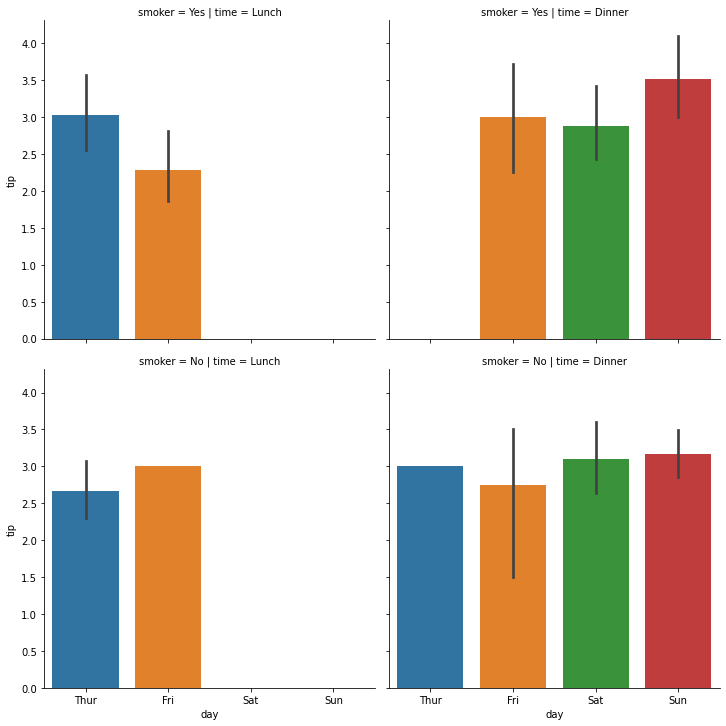

In [30]:
# 요일별(x 축) tip의 평균(y축) 막대 그래프
# 흡연여부별(row)로 subplot을 생성, 시간별(col)
sns.catplot(data=tips, x='day', y='tip', kind='bar',
            row='smoker', col='time')
plt.show()
